**NLTK**

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

**Information Extraction**


In [2]:
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [3]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [4]:
sent = preprocess(ex)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

In [5]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'


**Chunking**


In [6]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


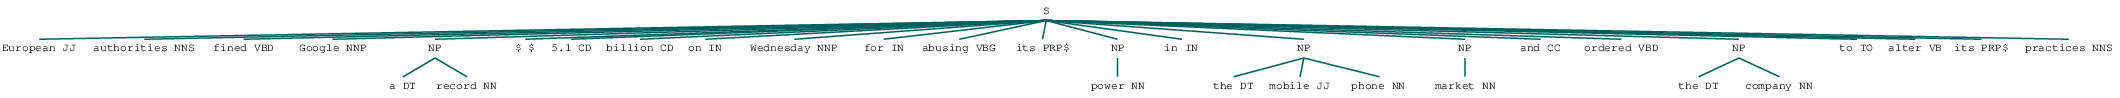

In [7]:
display(cs)

In [8]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


In [13]:
from nltk import ne_chunk
ne_tree = ne_chunk(pos_tag(word_tokenize(ex)))
print(ne_tree)

(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


**SpaCy**

**Entity**

In [14]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [15]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


**Token**

In [16]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])


[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


**Extracting named entity from an article**


In [2]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
len(article.ents)

FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [1]:
from bs4 import BeautifulSoup
import requests
import re